In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Knutson_data = pd.read_csv('HJ_hosts_knutson.txt', delimiter = '\t', skiprows = 3, skipfooter = 7, usecols = [0,1,2,3,4,5], header = 0 , names = ['Star', 'Teff', 'vsini', 'B-V', 'Shk', 'logRhk'], engine = 'python')
star_alias = {'HD 147506' : 'HAT-P-2', 'XO-2' : 'XO-2 N', 'HAT-P-10' : 'WASP-11', 'upsi And' : 'ups And'}

In [4]:
HJ_fulldata = pd.read_csv('HJ_fulldata.csv', delimiter = ',', comment = '#')
HJ_headers_l = ['hostname', 'pl_name', 'st_mass', 'st_rad', 'st_teff', 'st_lum', 'st_age', 'Shk', 'logRhk', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_radj', 'pl_orbsmax', 'pl_orbper', 'pl_orbeccen']
HJ_headers = ['st_mass', 'st_rad', 'st_teff', 'st_lum', 'st_age', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_radj', 'pl_orbsmax', 'pl_orbper', 'pl_orbeccen']

def make_HJ_data():
    
    df = pd.DataFrame(columns=HJ_headers_l)
    for star in Knutson_data['Star']:
        star_dict = {}
        if star in star_alias:
            star_name = star_alias[star]
        else:
            star_name = star
        for header_name in HJ_headers:
            value = np.nanmedian(HJ_fulldata[HJ_fulldata["hostname"] == star_name][header_name])
            star_dict[header_name] = value
        star_dict['hostname'] = star_name
        star_dict['pl_name'] = star_name + ' b'
        star_dict['Shk'] = Knutson_data[Knutson_data['Star'] == star]['Shk'].item()
        star_dict['logRhk'] = Knutson_data[Knutson_data["Star"] == star]['logRhk'].item()
        df = pd.concat([df, (pd.Series(star_dict)).to_frame().T])
    return df
            
    

In [5]:
data = make_HJ_data()

/Users/ethan/opt/anaconda3/envs/chianti/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/ethan/opt/anaconda3/envs/chianti/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/ethan/opt/anaconda3/envs/chianti/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/ethan/opt/anaconda3/envs/chianti/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/ethan/opt/anaconda3/envs/chianti/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanme

In [6]:
data

,hostname,pl_name,st_mass,st_rad,st_teff,st_lum,st_age,Shk,logRhk,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_radj,pl_orbsmax,pl_orbper,pl_orbeccen
0,HD 17156,HD 17156 b,1.27,1.495,6079.0,0.412,3.375,0.155,-5.022,3.22,0.097,-0.097,1.091,0.1614,21.216441,0.67605
0,HAT-P-2,HAT-P-2 b,1.33,1.575,6295.0,0.53,2.6,0.191,-4.78,8.96,0.27,-0.27,1.13,0.06795,5.63347,0.510115
0,HD 149026,HD 149026 b,1.32,1.455,6160.0,0.435,2.11,0.152,-5.03,0.3575,0.018,-0.0175,0.739,0.04313,2.875891,0.0028
0,HD 179949,HD 179949 b,1.22,1.27,6172.1,NaN,NaN,0.232,-4.622,0.933,0.045,-0.045,NaN,0.044695,3.092524,0.022
0,HD 189733,HD 189733 b,0.835,0.775,5023.0,-0.463,6.8,0.508,-4.501,1.15,0.0485,-0.047,1.139,0.03106,2.218575,0.0
0,HD 209458,HD 209458 b,1.12,1.18,6052.0,0.231,3.1,0.16,-4.97,0.685,0.021,-0.021,1.385,0.04707,3.524749,0.0
0,HD 80606,HD 80606 b,1.02,1.04,5569.445,-0.002,5.9,0.154,-5.061,4.114,0.13,-0.13,1.003,0.45645,111.43639,0.93233
0,GJ 436,GJ 436 b,0.45,0.45,3456.0,-1.633,6.0,0.62,-5.298,0.0713,0.0057,-0.0057,0.368,0.02871,2.643896,0.151
0,ups And,ups And b,NaN,NaN,NaN,NaN,NaN,0.156,-4.982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,TrES-1,TrES-1 b,0.89,0.835,5236.41,-0.301,3.7,0.244,-4.738,0.752,0.051,-0.051,1.081,0.03928,3.03007,0.0


In [7]:
#want to ignore stars/planets that are outliers 

mask_stars = (data['st_mass'] > 0.6) & (data['st_rad'] > 0.6)
mask_planets = (data['pl_bmassj'] > 0.5) & (data['pl_bmassj'] < 4) & (data['pl_radj'] > 0.75) & (data['pl_radj'] < 1.5)
reduced_ca_vinfl = (data['logRhk'] < -5.1) & (data['pl_radj'] > 1.5)
reduced_ca = (data['logRhk'] < -5.1) & (data['pl_radj'] < 1.5)

28
6


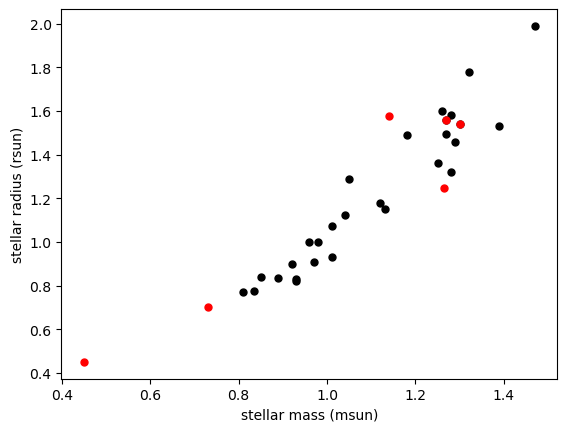

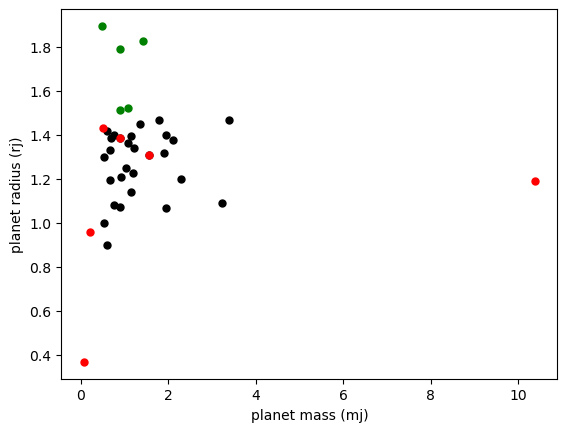

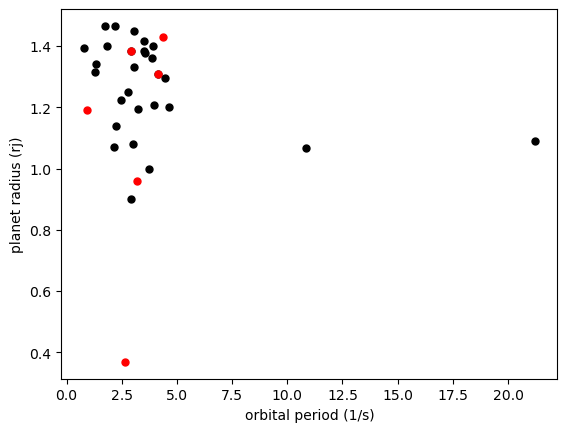

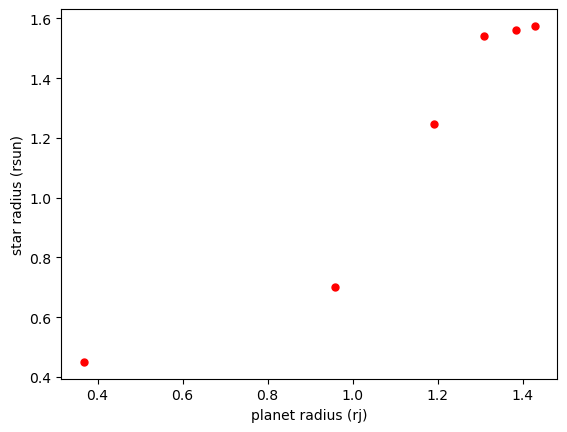

In [8]:
reduced_data = data[mask_stars & mask_planets] 
reduced_data2 = data[reduced_ca]
reduced_data3 = data[reduced_ca_vinfl]
print(len(reduced_data))
print(len(reduced_data2))

#stellar population
plt.plot(reduced_data['st_mass'], reduced_data['st_rad'], 'k.', markersize = 10)
plt.plot(reduced_data2['st_mass'], reduced_data2['st_rad'], 'r.', markersize = 10)
plt.xlabel('stellar mass (msun)')
plt.ylabel('stellar radius (rsun)')
plt.show()

#planet population
plt.plot(reduced_data['pl_bmassj'], reduced_data['pl_radj'], 'k.', markersize = 10)
plt.plot(reduced_data2['pl_bmassj'], reduced_data2['pl_radj'], 'r.', markersize = 10)
plt.plot(reduced_data3['pl_bmassj'], reduced_data3['pl_radj'], 'g.', markersize = 10)
plt.xlabel('planet mass (mj)')
plt.ylabel('planet radius (rj)')
plt.show()

#planet population
plt.plot(reduced_data['pl_orbper'], reduced_data['pl_radj'], 'k.', markersize = 10)
plt.plot(reduced_data2['pl_orbper'], reduced_data2['pl_radj'], 'r.', markersize = 10)
plt.xlabel('orbital period (1/s)')
plt.ylabel('planet radius (rj)')
plt.show()

#planet population that have reduced calcium hk 
#relation between planets and stars that have reduced calcium hk

#plt.plot(reduced_data2['pl_bmassj'], reduced_data2['pl_radj'], 'k.')
#plt.xlabel('planet mass (mj)')
#plt.ylabel('planet radius (rj)')
#plt.show()

plt.plot(reduced_data2['pl_radj'], reduced_data2['st_rad'], 'r.', markersize = 10)
plt.xlabel('planet radius (rj)')
plt.ylabel('star radius (rsun)')
plt.show()

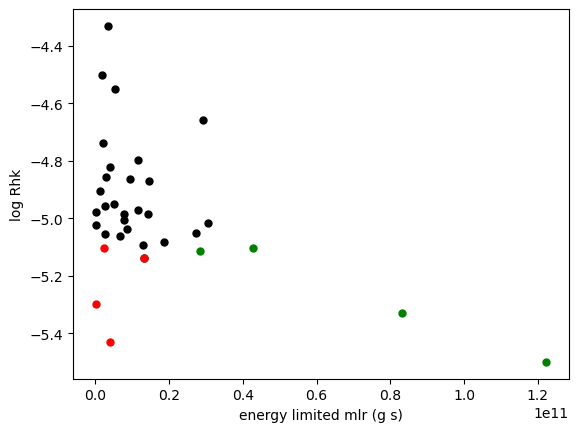

In [9]:
#some data analysis 

def el_mlr(smax, Ls, mp, rp):
    
    Fuv = Ls / (4 * np.pi * smax**2)
    Mel = Fuv * rp**3 / (6.67e-8 * mp)
    return Mel

plt.plot(el_mlr(reduced_data['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data['st_lum'] * 10**-6, reduced_data['pl_bmassj'] * 1.89e30, reduced_data['pl_radj'] * 7e9), reduced_data['logRhk'], 'k.', markersize = 10)
plt.plot(el_mlr(reduced_data2['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data2['st_lum'] * 10**-6, reduced_data2['pl_bmassj'] * 1.89e30, reduced_data2['pl_radj'] * 7e9), reduced_data2['logRhk'], 'r.', markersize = 10)
plt.plot(el_mlr(reduced_data3['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data3['st_lum'] * 10**-6, reduced_data3['pl_bmassj'] * 1.89e30, reduced_data3['pl_radj'] * 7e9), reduced_data3['logRhk'], 'g.', markersize = 10)
plt.xlabel('energy limited mlr (g s)')
plt.ylabel('log Rhk')
plt.show()

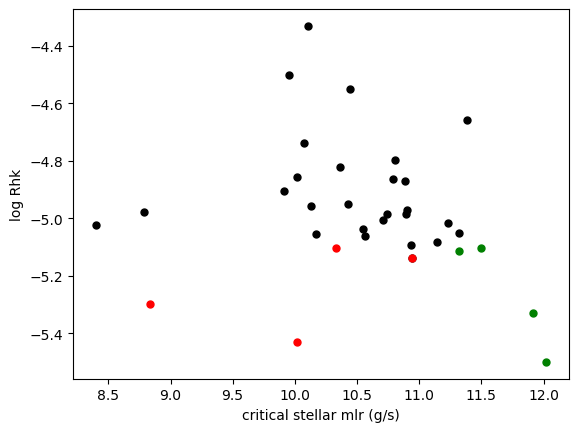

In [27]:
#find critical mass loss rate of star that expels planetary outflow from system

G = 6.67e-8

def mlr_star_c(smax, Ls, ms, mp, rp):
    
    omega = (G * ms / smax**3)**(1/2)
    vesc = (2 * G * ms / smax)**(1/2)
    vescp = (2 * G * mp / rp)**(1/2)
    
    mlr_c = smax * el_mlr(smax, Ls, mp, rp) * omega / (vescp * 0.5)
    
    return mlr_c 


plt.plot(np.log10(mlr_star_c(reduced_data['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data['st_lum'] * 10**-6, reduced_data['st_mass'] * 2e33, reduced_data['pl_bmassj'] * 1.89e30, reduced_data['pl_radj'] * 7e9).astype('float64')), reduced_data['logRhk'], 'k.', markersize = 10)
plt.plot(np.log10(mlr_star_c(reduced_data2['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data2['st_lum'] * 10**-6, reduced_data2['st_mass'] * 2e33, reduced_data2['pl_bmassj'] * 1.89e30, reduced_data2['pl_radj'] * 7e9).astype('float64')), reduced_data2['logRhk'], 'r.', markersize = 10)
plt.plot(np.log10(mlr_star_c(reduced_data3['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data3['st_lum'] * 10**-6, reduced_data3['st_mass'] * 2e33, reduced_data3['pl_bmassj'] * 1.89e30, reduced_data3['pl_radj'] * 7e9).astype('float64')), reduced_data3['logRhk'], 'g.', markersize = 10)
plt.xlabel('critical stellar mlr (g/s)')
plt.ylabel('log Rhk')

plt.savefig('sw_vs_logRHk')

In [24]:
np.log10(mlr_star_c(reduced_data['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data['st_lum'] * 10**-6, reduced_data['st_mass'] * 2e33, reduced_data['pl_bmassj'] * 1.89e30, reduced_data['pl_radj'] * 7e9).astype('float64'))

0     8.397422
0     9.956802
0    10.897963
0    10.075006
0    10.425806
0    10.440403
0    10.131170
0          NaN
0    10.742509
0     9.915688
0    11.145956
0    10.566559
0    10.808717
0    11.234799
0    10.890576
0    10.931014
0    10.360397
0    10.946035
0    10.015555
0     8.787016
0    10.168862
0    10.888834
0    10.788600
0    11.385803
0    10.109466
0    10.547716
0    10.706974
0    11.320908
dtype: float64

In [253]:
G = 6.67e-8

def mlr_star_c(smax, Ls, ms, mp, rp):
    
    omega = (G * ms / smax**3)**(1/2)
    vesc = (2 * G * ms / smax)**(1/2)
    vescp = (2 * G * mp / rp)**(1/2)
    
    mlr_c = smax * el_mlr(smax, Ls, mp, rp) * omega / (vescp * 0.5)
    
    return mlr_c

def H(smax, ms, mp, rp):
    
    omega = (G * ms / smax**3)**(1/2)
    vescp = (2 * G * mp / rp)**(1/2)
    
    return vescp / omega
    
    
    
    

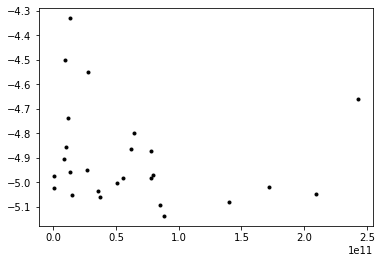

In [235]:
plt.plot(mlr_star_c(reduced_data['pl_orbsmax'] * 1.5e13, 4e33 * 10**reduced_data['st_lum'] * 10**-6, reduced_data['st_mass'] * 2e33, reduced_data['pl_bmassj'] * 1.89e30, reduced_data['pl_radj'] * 7e9), reduced_data['logRhk'], 'k.')


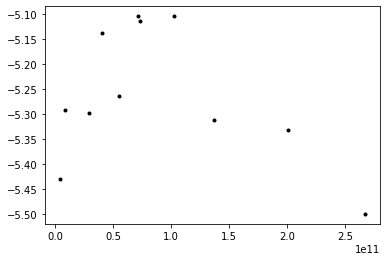

In [262]:
plt.plot(mlr_star_c(r_data2['pl_orbsmax'] * 1.5e13, 4e33 * 10**-6, r_data2['st_mass'] * 2e33, r_data2['pl_bmassj'] * 1.89e30, r_data2['pl_radj'] * 7e9), r_data2['logRhk'], 'k.')

In [115]:
def hs(smax, ms, mp):
    
    return smax * (mp / (3 * ms))**(1/3)

In [27]:
#figueira data

figueira_data = pd.read_csv('FigueiraHJ.csv')

In [49]:
fHJ_fulldata = pd.read_csv('figueira_HJalldata.csv', delimiter = ',', comment = '#')

In [ ]:
def make_HJ_dataf():
    
    df = pd.DataFrame(columns=HJ_headers_l)
    for planet in figueira_data['planet']:
        planet_dict = {}
        if planet in planet_alias:
            planet_name = planet_alias[star]
        else:
            planet_name = planet
        for header_name in HJ_headers:
            value = np.nanmedian(HJ_fulldata[HJ_fulldata["pl_name"] == planet_name][header_name])
            planet_dict[header_name] = value
        planet_dict['hostname'] = planet_name
        planet_dict['pl_name'] = planet_name + ' b'
        planet_dict['Shk'] = Knutson_data[Knutson_data['Star'] == star]['Shk'].item()
        planet_dict['logRhk'] = Knutson_data[Knutson_data["Star"] == star]['logRhk'].item()
        df = pd.concat([df, (pd.Series(star_dict)).to_frame().T])
    return df

In [51]:
fHJ_fulldata

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,2004,McDonald Observatory,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2016-01,2016-01-21
1,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,2004,McDonald Observatory,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2014-09,2019-10-24
2,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,2004,McDonald Observatory,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2014-06,2014-08-21
3,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,2004,McDonald Observatory,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2016-04,2019-01-31
4,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,2004,McDonald Observatory,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2009-03,2014-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,WASP-117 b,WASP-117,0,1,1,Transit,2014,SuperWASP,Published Confirmed,0,...,-0.005,8.780,0.021,-0.021,10.02690,0.000301,-0.000301,2019-08-09,2019-02,2019-08-15
661,WASP-117 b,WASP-117,0,1,1,Transit,2014,SuperWASP,Published Confirmed,0,...,-0.005,8.780,0.021,-0.021,10.02690,0.000301,-0.000301,2019-03-18,2017-06,2019-03-21
662,WASP-117 b,WASP-117,0,1,1,Transit,2014,SuperWASP,Published Confirmed,0,...,-0.005,8.780,0.021,-0.021,10.02690,0.000301,-0.000301,2022-05-03,2022-05,2022-05-03
663,WASP-117 b,WASP-117,0,1,1,Transit,2014,SuperWASP,Published Confirmed,0,...,-0.005,8.780,0.021,-0.021,10.02690,0.000301,-0.000301,2019-12-02,2014-08,2014-08-27


In [24]:
figueira_data.keys()

Index(['planet', 'logRhk', 'gp', 'M', 'R', 'a', 'Teff1', 'Teff2', 'misc'], dtype='object')

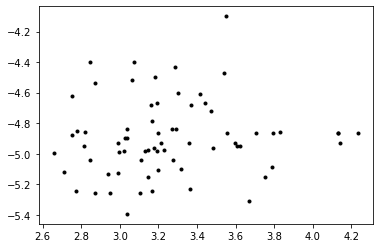

In [25]:
plt.plot(figueira_data['gp'], np.float64(figueira_data['logRhk']), 'k.')

In [52]:
figueira_data

,planet,logRhk,gp,M,R,a,Teff1,Teff2,misc
0,55Cnc e,-5.04349,3.278,0.026,0.185,\t0.0156,5196,5279,(H)\t–/–\tOK/OK
1,CoRoT-7 b,-4.61200,3.416,0.023,0.148,\t0.0172,5313,5288,(H)\t–/–\tOK/OK
2,HAT-P-15 b,-4.95000,3.623,1.946,1.072,\t0.0964,5568,5568,\tOK/OK\tOK/OK
3,HAT-P-16 b,-4.86200,3.796,4.193,1.289,\t0.0413,6158,6158,\tOK/OK\tOK/OK
4,HAT-P-17 b,-5.03900,3.110,0.530,1.010,\t0.0882,5246,5332,(H)\tOK/OK\tOK/OK
...,...,...,...,...,...,...,...,...,...
64,WASP-69 b,-4.54000,2.871,0.300,1.000,\t0.04525,4700,b/,\tOK/–\tOK/–
65,WASP-70 b,-5.23000,3.366,0.600,0.800,\t0.04853,5700,b/,\tOK/–\tOK/–
66,WASP-80 b,-4.49500,3.180,0.554,0.952,\t0.0346,4145,4145,\t–/–\t–/–
67,WASP-84 b,-4.43000,3.287,0.694,0.942,\t0.0771,5314,5314,\tOK/OK\tOK/OK


In [47]:
figueira_data['planet'].to_csv("figueira_pl.csv", sep = "\n", index = False, header = False, index_label = False) 